<h2>Name: Pranit Hande</h2>
<h2> Task2: Stock Market Prediction And Forecasting Using Stacked LSTM</h2>

In [4]:
#import required libraries

import math
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Import Dataset From Drive

In [6]:
data = pd.read_csv("C:\\Users\\_Lenovo_\\Desktop\\datasets\\NSE-TATAGLOBAL.csv")

In [7]:
# print dataset
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [8]:
# explore dataset
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
# explore dataaset
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
# Details of each column in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
# Statistical Info of Dataset
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Dataframe Selection

In [12]:
# Consider necessary dataframe ie. column Close (closing price) from Dataset
df = data.reset_index()['Close']
df.shape

(2035,)

In [13]:
# explore dataframe
df.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [14]:
df.tail()

2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, dtype: float64

# Dataframe Visualization

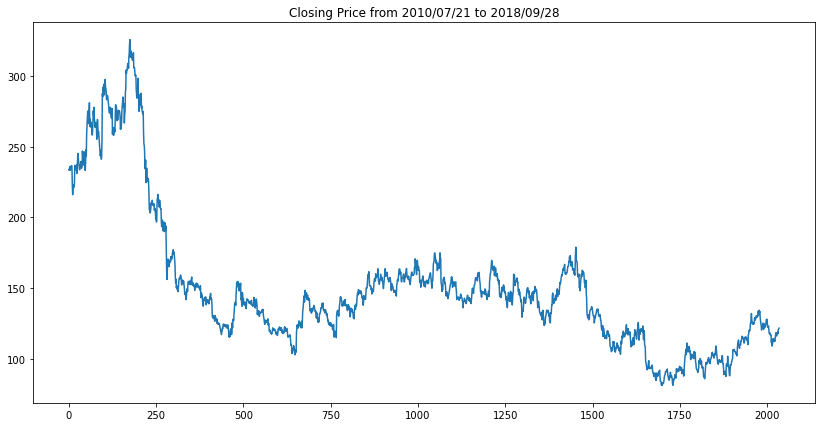

In [15]:
# Plot Graph for Closing Price of 2035 days
plt.figure(figsize=(14, 7))
plt.plot(df)
plt.title("Closing Price from 2010/07/21 to 2018/09/28")
plt.show()

# Scaling Dataframe using MinMaxScaler

In [16]:
# scaling dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [17]:
# modified dataframe
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Split Dataframe into Training And Testing Set

In [18]:
# Split Dataframe into Training and Testing Dataset in ration 80:20
train_size = int(len(df) * 0.80)
train_data, test_data = df[0:train_size, :], df[train_size:len(df), :1]

In [19]:
# Explore Training and Testing Dataset
print("Training Set Head:\n",train_data[:5:])
print()
print("Training Set Tail:\n",train_data[:-6:-1])
print()
print("Training Set Size:",train_data.shape)
print()
print("Testing Set Head:\n",test_data[:5:])
print()
print("Testing Set Tail:\n",test_data[:-6:-1])
print()
print("Testing Set Size:",test_data.shape)

Training Set Head:
 [[0.62418301]
 [0.62214052]
 [0.62622549]
 [0.63378268]
 [0.62234477]]

Training Set Tail:
 [[0.1431781 ]
 [0.13419118]
 [0.1435866 ]
 [0.15216503]
 [0.14644608]]

Training Set Size: (1628, 1)

Testing Set Head:
 [[0.16115196]
 [0.16176471]
 [0.17320261]
 [0.18218954]
 [0.16237745]]

Testing Set Tail:
 [[0.16584967]
 [0.16319444]
 [0.1621732 ]
 [0.14971405]
 [0.15400327]]

Testing Set Size: (407, 1)


# Convert Array Dataframe into Matrix

In [20]:
def make_dataset(data, time_step):
	d1, d2 = [], []
	for i in range(len(data)-time_step-1):  
		d1.append(data[i:(i + time_step), 0])
		d2.append(data[i + time_step, 0])
	return np.array(d1), np.array(d2)

In [21]:
# Split it into X and y variables
X_train, y_train = make_dataset(train_data, 100)
X_test, y_test = make_dataset(test_data, 100)

In [22]:
print("Size of Training set for X",X_train.shape)
print("Size of Training set for y",y_train.shape)
print("Size of Testing set for X",X_test.shape)
print("Size of Testing set for y",y_test.shape)

Size of Training set for X (1527, 100)
Size of Training set for y (1527,)
Size of Testing set for X (306, 100)
Size of Testing set for y (306,)


In [23]:
# Reshape dataframe in form of [Data, Steps, Feature]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating Deep Learning Model LSTM

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#initialize a sequential model
model = Sequential()

# add keras layers to the model
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

# configure model for training
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [25]:
#description of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 256, verbose = 1)

Epoch 1/100
6/6 [==============================] - 11s 2s/step - loss: 8.9217e-04 - val_loss: 5.5197e-04
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 8.8559e-04 - val_loss: 4.7736e-04
Epoch 3/100
6/6 [==============================] - 10s 2s/step - loss: 9.2149e-04 - val_loss: 5.6865e-04
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 8.9442e-04 - val_loss: 5.7810e-04
Epoch 5/100
6/6 [==============================] - 14s 2s/step - loss: 9.4367e-04 - val_loss: 4.4703e-04
Epoch 6/100
6/6 [==============================] - 11s 2s/step - loss: 9.0316e-04 - val_loss: 5.4113e-04
Epoch 7/100
6/6 [==============================] - 12s 2s/step - loss: 8.4373e-04 - val_loss: 5.6949e-04
Epoch 8/100
6/6 [==============================] - 14s 2s/step - loss: 8.2532e-04 - val_loss: 4.7129e-04
Epoch 9/100
6/6 [==============================] - 11s 2s/step - loss: 8.0268e-04 - val_loss: 5.6531e-04
Epoch 10/100
6/6 [==============================] - 12s

6/6 [==============================] - 14s 2s/step - loss: 4.4480e-04 - val_loss: 3.0368e-04
Epoch 79/100
6/6 [==============================] - 14s 2s/step - loss: 4.3564e-04 - val_loss: 3.2415e-04
Epoch 80/100
6/6 [==============================] - 17s 3s/step - loss: 4.2794e-04 - val_loss: 3.1485e-04
Epoch 81/100
6/6 [==============================] - 13s 2s/step - loss: 4.1510e-04 - val_loss: 3.1397e-04
Epoch 82/100
6/6 [==============================] - 15s 3s/step - loss: 4.1257e-04 - val_loss: 3.0093e-04
Epoch 83/100
6/6 [==============================] - 17s 3s/step - loss: 4.2370e-04 - val_loss: 3.3316e-04
Epoch 84/100
6/6 [==============================] - 12s 2s/step - loss: 4.1800e-04 - val_loss: 3.2711e-04
Epoch 85/100
6/6 [==============================] - 17s 3s/step - loss: 4.0382e-04 - val_loss: 3.0554e-04
Epoch 86/100
6/6 [==============================] - 15s 3s/step - loss: 4.0311e-04 - val_loss: 2.8578e-04
Epoch 87/100
6/6 [==============================] - 13s 2s/

# Prediction for Training and Testing Set

In [28]:
# Predictions for Training and Testing Set (array)
train_pred = scaler.inverse_transform(model.predict(X_train))
test_pred = scaler.inverse_transform(model.predict(X_test))

10/10 [==============================] - 1s 140ms/step


# Check RMSE for the predictions

In [29]:
from sklearn.metrics import mean_squared_error
RSME_train = math.sqrt(mean_squared_error(y_train, train_pred))
RSME_test = math.sqrt(mean_squared_error(y_test, test_pred))
print("RSME for training set is:",RSME_train)
print("RSME for testing set is:",RSME_test)

RSME for training set is: 161.31662270674983
RSME for testing set is: 108.39210561874039


# Visualizing Predictions

In [30]:
len(df)

2035

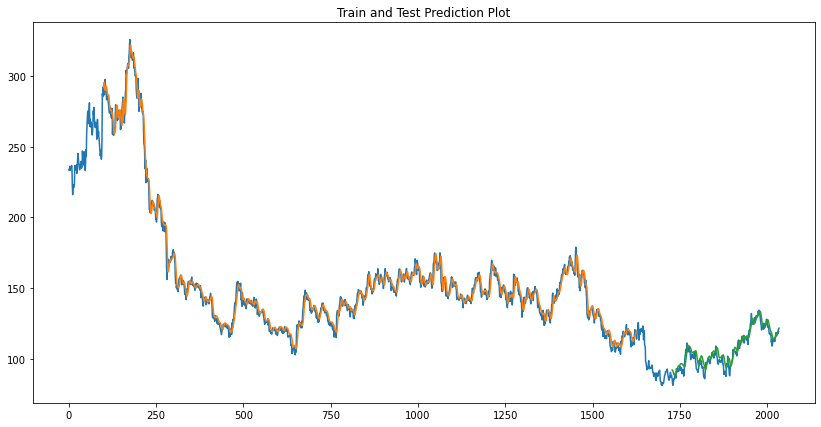

In [31]:
look_back = 100

# defining Train predictions
train_pred_plot = np.empty_like(df)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_pred) + look_back, :] = train_pred

# defining Test predictions
test_pred_plot = np.empty_like(df)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (look_back*2) + 1:len(df) - 1, :] = test_pred

# plotting predictions
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(df))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.title("Train and Test Prediction Plot")
plt.show()

In [32]:
# Reshape temporary output
X_input = test_data[307:].reshape(1,-1)
temp = list(X_input)
temp = temp[0].tolist()
temp

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

# Generate Prediction for next 30 days

In [35]:
# initialize next predictions as a list
next30_Pred = []
num_steps=100
i = 0
while (i < 30):
    if(len(temp) > 100):
        X_input = np.array(temp[1:])
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        next30_Pred.extend(yhat.tolist())
        i = i + 1
    else:
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        next30_Pred.extend(yhat.tolist())
        i = i + 1

print("Next 30 days Closing Price Generated Successfully")

Next 30 days Closing Price Generated Successfully


# Next 30 days Prediction Visualization

In [36]:
new_day = np.arange(1, 101)
pred_day = np.arange(101, 131)

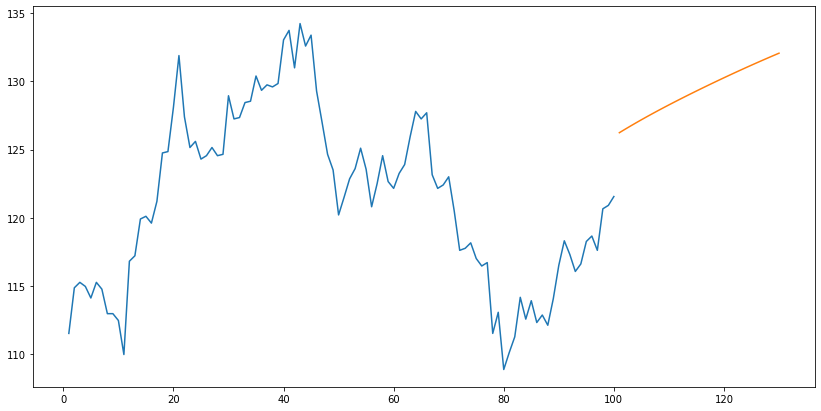

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(new_day, scaler.inverse_transform(df[1935:]))
plt.plot(pred_day, scaler.inverse_transform(next30_Pred))
plt.show()

In [38]:
df = df.tolist()
df.extend(next30_Pred)

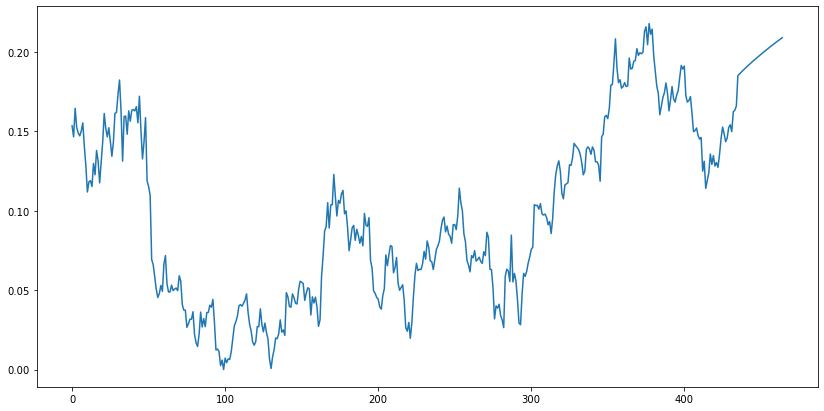

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(df[1600:])
plt.show()

<h3>Conclusion:<h3>
1. Long Short Term Memory(LSTM)deep learning model is an useful model for Stock Market Prediction.<br>
2. The accuracy of LSTM model depends upon three factors i.e batch size, epoch and learning rate.</b>